<a href="https://colab.research.google.com/github/ali-talebi/proposal_master/blob/main/poly3_nomial_transport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
from  sklearn.preprocessing import PolynomialFeatures , StandardScaler

In [45]:
import numpy as np
import matplotlib.pyplot as plt

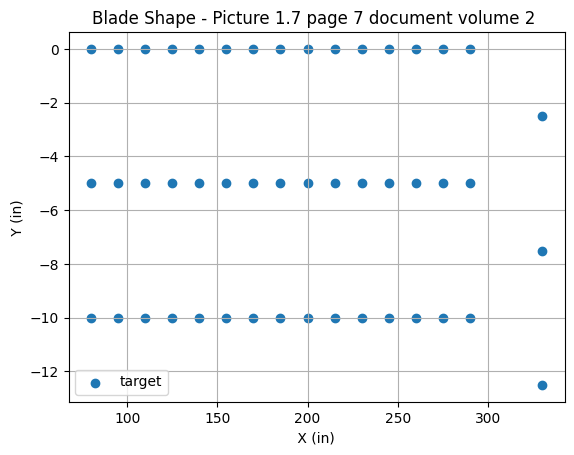

In [59]:
points = []
start_x = 65
start_y = [0 , -5 , -10.0 ]
for i in range(15) :
  start_x +=  15

  for j in range(3) :
    points.append([start_x , start_y[j] , 0 ] )

points.append([330 , -2.5 , 0 ])
points.append([330 , -7.5 , 0 ])
points.append([330 , -12.5 , 0 ])
total_points = np.array(points)
plt.scatter(total_points[ : ,  0 ] , total_points[ : , 1 ] , label = "target" )
plt.legend()
plt.title("Blade Shape - Picture 1.7 page 7 document volume 2 ")
plt.xlabel(" X (in) ")
plt.ylabel(" Y (in) ")
plt.grid()
plt.show()

In [60]:
dict_28_24_blade_1 = {"r/R"           :[0.2001 , 0.2499 ,0.2998 , 0.3498 , 0.3913 , 0.4496 , 0.4997 , 0.5387 , 0.5996 , 0.6498 , 0.6998 , 0.7500 , 0.8001 , 0.8497 , 0.9102 , 0.9734 ] ,
              "Delta XMean (in.)"     : [-0.0045 , -0.0011 , -0.0281 , -0.0177 , -0.0113 , -0.0186 , -0.0133 , -0.0232 , -0.0338 , -0.0307 , -0.0633 , -0.0773 , -0.0811 , -0.1920 , -0.2623 , -0.2629 ] ,
              "Delta XStd (in.)"      : [0.0010 , 0.0009 , 0.0011 , 0.0011 , 0.0016 , 0.0019 , 0.0022 , 0.0020 , 0.0019 , 0.0023 , 0.0021 , 0.0021 , 0.0021 , 0.0022 , 0.0023 , 0.0026 ] ,
              "Delta YMean (in.)"     : [-0.0132 , -0.0225 , -0.0483 , -0.0939 , -0.1256 , -0.1809 , -0.2209 , -0.2510 , -0.3087 , -0.3422 , -0.3874 , -0.4184 , -0.5123 , -0.5296 , -0.5487 , -0.5354 ] ,
              "Delta YStd (in.)"      : [0.0007 , 0.0013 , 0.0028 , 0.0046 , 0.0066 , 0.0088 , 0.0111 , 0.0126 , 0.0150 , 0.0176 , 0.0201 , 0.0229 , 0.0258 , 0.0284 , 0.0313 , 0.0350 ]  ,
              "Delta ZMean (in.)"     : [-0.0050 , -0.0010 , -0.0251  ,-0.0442 , -0.0622 , -0.1306 , -0.2121 , -0.3077 , -0.4860 , -0.7122 , -0.9213 , -1.1503 , -1.3874 , -1.7166 , -2.1240 , -2.5162 ] ,
              "Delta ZStd (in.)"      : [0.0023 , 0.0046 , 0.0089 , 0.0145 , 0.0211 , 0.0267 , 0.0347 , 0.0404 , 0.0480 , 0.0540 , 0.0607 , 0.0666 , 0.0718 , 0.0784 , 0.0857 , 0.0943 ] ,
              "Delta TwistMean (deg)" : [-0.0685 , 0.2730 , 0.0049  , 0.0060 , 0.0002 , -0.1528 , -0.1632 , -0.3044 , -0.2646 , -0.4566 , -0.4899 , -0.3256 , 0.0164 , -0.3486 , -0.6888 , -0.6556 ] ,
              "Delta TwistStd (deg)"  : [0.0233 , 0.0392 , 0.0515 , 0.0431 , 0.0476 , 0.0461 , 0.0479 , 0.0528 , 0.0516 , 0.0503 , 0.0581 , 0.0443 , 0.0504 , 0.0462  , 0.0444 , 0.0510]
}


table_28_24_blade_1 = pd.DataFrame(dict_28_24_blade_1)

In [61]:
params = []
for iteration  in range(100) :
  new_data_simulated_from_table_28_24 = []
  for i in range(table_28_24_blade_1.shape[0]) :
    x_mean = table_28_24_blade_1.iloc[ i , 1 ]
    x_std  = table_28_24_blade_1.iloc[ i , 2 ]
    y_mean = table_28_24_blade_1.iloc[ i , 3 ]
    y_std  = table_28_24_blade_1.iloc[ i , 4 ]
    z_mean = table_28_24_blade_1.iloc[ i , 5 ]
    z_std  = table_28_24_blade_1.iloc[ i , 6 ]

    for element in total_points[i*3 : (i+1)*3 , : ] :
      x_sample = element[0]
      y_sample = element[1]
      z_sample = element[2]

      rng = np.random.default_rng()

      x_added = rng.normal(x_mean, x_std , size=1 )
      x_added = x_added.tolist()[0]
      x_sample += x_added

      y_added = rng.normal(y_mean, y_std , size=1 )
      y_added = y_added.tolist()[0]
      y_sample += y_added

      z_added = rng.normal(z_mean, z_std , size=1 )
      z_added = z_added.tolist()[0]
      z_sample += z_added
      new_data_simulated_from_table_28_24.append([x_sample ,y_sample , z_sample ])

In [65]:
new_data_simulated_from_table_28_24 = np.array(new_data_simulated_from_table_28_24)

In [66]:
x = new_data_simulated_from_table_28_24[ : , 0 : 2 ]
z = new_data_simulated_from_table_28_24[ : , 2 ]

In [67]:
x

array([[ 7.99955753e+01, -1.41950471e-02],
       [ 7.99957961e+01, -5.01358738e+00],
       [ 7.99956661e+01, -1.00125219e+01],
       [ 9.49982956e+01, -2.18483092e-02],
       [ 9.49989120e+01, -5.02257330e+00],
       [ 9.49977624e+01, -1.00254521e+01],
       [ 1.09971052e+02, -4.99897212e-02],
       [ 1.09973246e+02, -5.04369147e+00],
       [ 1.09973467e+02, -1.00491251e+01],
       [ 1.24982583e+02, -8.57257809e-02],
       [ 1.24981030e+02, -5.09419715e+00],
       [ 1.24981033e+02, -1.00851497e+01],
       [ 1.39987224e+02, -1.26142724e-01],
       [ 1.39989376e+02, -5.12862609e+00],
       [ 1.39987485e+02, -1.01272421e+01],
       [ 1.54978787e+02, -1.87965502e-01],
       [ 1.54979564e+02, -5.18407580e+00],
       [ 1.54980533e+02, -1.01740789e+01],
       [ 1.69984849e+02, -2.02900997e-01],
       [ 1.69982820e+02, -5.21947665e+00],
       [ 1.69988513e+02, -1.02376106e+01],
       [ 1.84975622e+02, -2.50731057e-01],
       [ 1.84976014e+02, -5.25480427e+00],
       [ 1.

In [68]:
z

array([-5.75629978e-03, -9.27323628e-03, -2.07750678e-03,  3.43052528e-03,
       -5.48346309e-03,  3.62911143e-03, -1.99287112e-02, -3.25556880e-02,
       -3.84807924e-02, -3.78440610e-02, -4.97982789e-02, -4.41896736e-02,
       -9.65457195e-02, -2.75558137e-02, -8.84292284e-02, -1.67884559e-01,
       -1.08922420e-01, -1.19731653e-01, -2.24052152e-01, -1.73125751e-01,
       -2.80997294e-01, -3.75722036e-01, -3.01244030e-01, -2.56308778e-01,
       -4.11128907e-01, -4.29124715e-01, -4.67715492e-01, -6.76698707e-01,
       -7.33747869e-01, -8.10763477e-01, -9.09073160e-01, -9.23204010e-01,
       -9.77071198e-01, -1.18310864e+00, -1.06178898e+00, -1.21841432e+00,
       -1.23824618e+00, -1.38010122e+00, -1.34298925e+00, -1.71191191e+00,
       -1.68859174e+00, -1.63857426e+00, -2.04675277e+00, -2.08614823e+00,
       -2.20489534e+00, -2.27190110e+00, -2.36386003e+00, -2.59297836e+00])

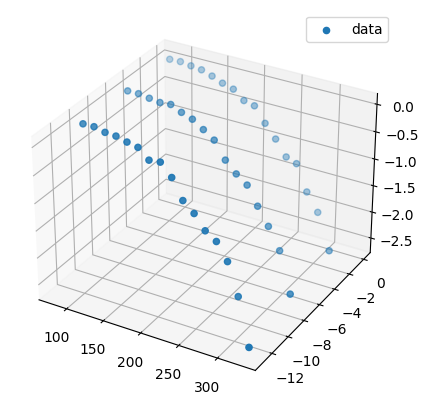

In [65]:
fig = plt.figure(figsize = (5 , 5 ) )
ax1 = fig.add_subplot(  projection='3d' )
ax1.scatter3D(new_data_simulated_from_table_28_24[ : , 0 ] , new_data_simulated_from_table_28_24[: , 1 ] , new_data_simulated_from_table_28_24[: , 2 ] , label="data")
ax1.legend()
ax1.grid()
plt.show()

In [87]:
poly = PolynomialFeatures(degree= 3 )
x_poly = poly.fit_transform(x)



In [88]:
x_poly.shape

(48, 10)

In [89]:
scaler = StandardScaler()
x_poly_standarded = scaler.fit_transform(x_poly)


In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
lr = LinearRegression()
lr.fit(x_poly_standarded , z )

LinearRegression()

In [92]:
y_predict = lr.predict(x_poly_standarded )

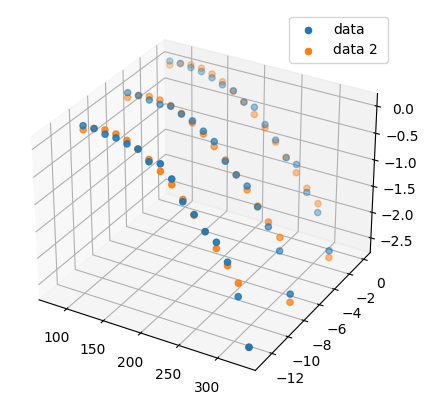

In [120]:
fig = plt.figure(figsize = (5 , 5 ) )
ax1 = fig.add_subplot(  projection='3d' )
ax1.scatter3D(new_data_simulated_from_table_28_24[ : , 0 ] , new_data_simulated_from_table_28_24[: , 1 ] , new_data_simulated_from_table_28_24[: , 2 ] , label="data")
ax1.scatter3D(new_data_simulated_from_table_28_24[ : , 0 ] , new_data_simulated_from_table_28_24[: , 1 ] , y_predict , label="data 2 ")
ax1.legend()
ax1.grid()
plt.show()

In [94]:
lr.coef_

array([ 0.        ,  2.10948488, -0.02923125, -4.70195039, -0.24845398,
       -0.3432666 ,  1.88139335,  0.02405082, -0.27818319, -0.35459726])

In [95]:
from sklearn.metrics import mean_squared_error

In [96]:
delta = mean_squared_error(y_predict , z  )

In [97]:
print(delta)

0.008210746026839882


In [104]:
x.shape

(48, 2)

In [105]:
y.shape

(150, 1)

In [113]:
x[ : , 0 ].shape

(48,)

In [114]:
x[: , 1 ].shape

(48,)

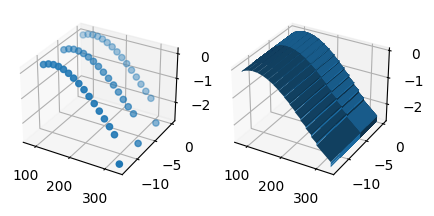

In [130]:
fig = plt.figure( figsize = (5 , 5 ))
ax9 = fig.add_subplot(  1 , 2 , 1 , projection='3d' )
U5_meshgrid , V5_meshgrid = np.meshgrid(x[ : , 0 ],x[: , 1 ])
ax9.scatter3D(new_data_simulated_from_table_28_24[ : , 0 ] , new_data_simulated_from_table_28_24[: , 1 ] , y_predict.reshape(-1 , 1 ) , label="data 2 ")
ax10 = fig.add_subplot(  1 , 2 , 2 ,  projection='3d' )

ax10.plot_surface( U5_meshgrid , V5_meshgrid , y_predict.reshape(1 , -1 )  )


plt.show()

In [124]:
y_predict.shape

(48,)

In [126]:
y_predict.reshape(-1 , 1 ).shape

(48, 1)